In [8]:
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing import image
from keras.utils import load_img, img_to_array,array_to_img
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

def load_data_gen(x_train,y_train):
    datagen = ImageDataGenerator(rotation_range = 90,
                             width_shift_range=0.4,
                             height_shift_range=0.4,
                             vertical_flip =True,
                             horizontal_flip =True)
    gen_x_train = []
    gen_y_train = []
    for x in range(0,len(x_train)):
        idx = 0
        t = x_train[x].reshape((1,) + x_train[x].shape)
        for batch in datagen.flow(t , batch_size=1): # 여기서 batch는 x가 됨
            gen_x_train.append(batch[0])
            gen_y_train.append(y_train[x])
            idx += 1
            if idx%6 == 0:
                break
    
    return np.array(gen_x_train),np.array(gen_y_train)


def load_data():
    # data 가져오기
    open_list = [f for f in os.listdir('./open_eye/') if not f.startswith('.')]
    close_list = [f for f in os.listdir('./close_eye/') if not f.startswith('.')]

    images = []  # 실제 데이터
    labels = []  # 정답 데이터(1,0으로 분류)

    # 눈 이미지들이 약 80x80 ~ 110x110이여서 평균 100x100으로 잡음
    img_w, img_h = 100,100
    for i in open_list:
        image = load_img('./open_eye/' + i, target_size=(img_w, img_h))
        image = img_to_array(image)
        images.append(image)
        labels.append(0)  # 눈 떴을 때 : 0
    for i in close_list:
        image = load_img('./close_eye/' + i, target_size=(img_w, img_h))
        image = img_to_array(image)  # 이미지를 수로 이루어진 array로 만듦
        images.append(image)
        labels.append(1)  # 눈 감았을 때 : 1
    

    #전체 data 중 훈련 데이터 나누기
    x_train, x_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), test_size=0.2)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)
    return x_train, x_test, y_train, y_test

def make_model(x_train, x_test, y_train, y_test,epochs,batch_sizes):

    model = Sequential()
    # 눈 이미지들이 약 80x80 ~ 110x110이여서 평균 100x100으로 잡음
    img_w, img_h = 100,100
    model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (img_w,img_h,3), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))

    model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))

    model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = 'softmax'))


    model.summary()
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_sizes)
    model.save('eye_model4.h5')
    return model,history

def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['training', 'validation'], loc = 'upper left')
    plt.show()

# 데이터 가져오기
x_train, x_test, y_train, y_test = load_data()
x_train,y_train = load_data_gen(x_train,y_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

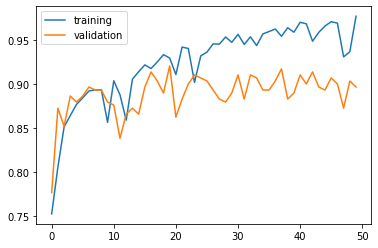

In [5]:
# model 학습 
epochs = 50
batch_sizes =10
model, history = make_model(x_train, x_test, y_train, y_test,epochs,batch_sizes)

results = model.evaluate(x_test, y_test)
print('Test accuracy: ', results[1])

plot_history(history)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 128)     

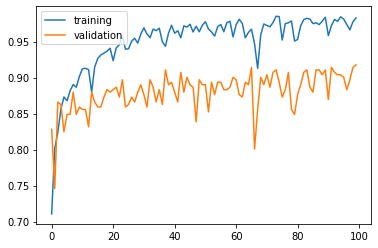

In [9]:
# model 학습 
epochs = 100
batch_sizes = 10
model, history = make_model(x_train, x_test, y_train, y_test,epochs,batch_sizes)

results = model.evaluate(x_test, y_test)
print('Test accuracy: ', results[1])

plot_history(history)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 128)     

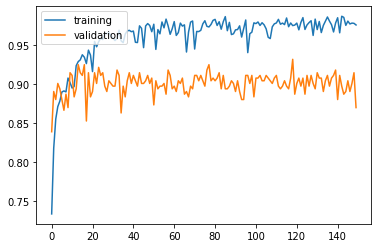

In [7]:
# model 학습 
epochs = 150
batch_sizes = 10
model, history = make_model(x_train, x_test, y_train, y_test,epochs,batch_sizes)

results = model.evaluate(x_test, y_test)
print('Test accuracy: ', results[1])

plot_history(history)